# Human Centered Data Science
## Part 2 - Extension Analysis
### Assigned County: Davidson County, TN

---------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### BELOW IS THE INITIAL PART OF ANALYSIS CONDUCTED BEFORE EXTENSION ANALYSIS. I HAVE INCLUDED THAT IN THIS CODE TO SHOW HOW I GOT THE DATA FOR CONFIRMED NEW CASES OF DAVIDSON COUNTY:

## Loading Raw data for US confirmed Covid cases

In [2]:
raw_data = pd.read_csv(r"data/RAW_us_confirmed_cases.csv")
raw_data.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/2

In [3]:
#subset data for Davidson County in Tennessee State
data_d = raw_data[(raw_data['Admin2']=='Davidson') & (raw_data['Province_State']=='Tennessee')]
data_d

#FIPS = 47037.0

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/2

In [4]:
data_d.columns

Index(['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_',
       ...
       '10/23/22', '10/24/22', '10/25/22', '10/26/22', '10/27/22', '10/28/22',
       '10/29/22', '10/30/22', '10/31/22', '11/1/22'],
      dtype='object', length=1026)

In [5]:
data_d.drop(columns = ['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',\
                       'Country_Region', 'Lat', 'Long_','Combined_Key'], inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
davidson_series = data_d.squeeze()
davidson_series.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: 2621, dtype: int64

<AxesSubplot:>

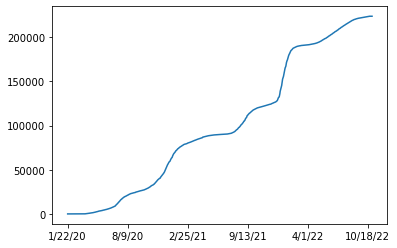

In [7]:
davidson_series.plot()

## Checking if time series is continuous

In [8]:
davidson_series.index = pd.to_datetime(davidson_series.index)
davidson_series1 = davidson_series.asfreq('d')
check = pd.Series(davidson_series1[davidson_series1.isnull()].index)
check

Series([], dtype: datetime64[ns])

### No gaps observed. Series is continuous.

In [9]:
davidson_df = pd.DataFrame(davidson_series).reset_index()
davidson_df.columns = ["date", "cases"]
davidson_df["date"] = pd.to_datetime(davidson_df["date"])
davidson_df.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [10]:
davidson_df['new_cases'] = davidson_df['cases'] - davidson_df.shift(periods=1)['cases']
davidson_df = davidson_df.fillna(0)
davidson_df.head()

,date,cases,new_cases
0,2020-01-22,0,0.0
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0


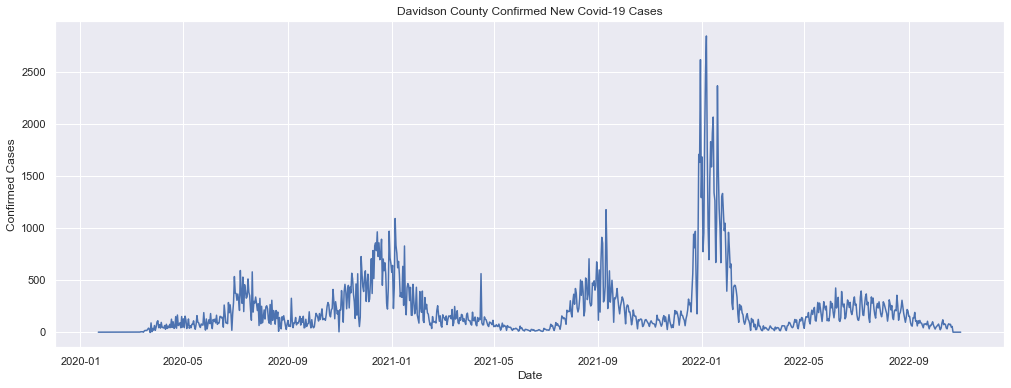

In [11]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'new_cases')
ax.set(title = 'Davidson County Confirmed New Covid-19 Cases', xlabel='Date', ylabel='Confirmed Cases')
plt.show()

### We observe several peaks in the timeline: July, Dec of 2020 and Jan, April, September of 2021.

### Since there was no mask mandate data available in the given dataset for Tennessee State/Davidson County, I did some external research - 

Source: https://www.vumc.org/health-policy/news-events/tennessee-areas-without-mask-requirements-have-higher-death-toll-capita
Published Date: November 10 2020

As per this report on counties in Tennessee, the areas where mask requirements were instituted showed substantially lower death rates due to COVID-19 as compared to areas without mask requirements, according to an analysis by Vanderbilt Department of Health Policy researchers.

The analysis, led by John Graves, PhD, associate professor of Health Policy and director of the Vanderbilt Center for Health Economic Modeling, finds that early adopting counties in Tennessee saw their death rate begin to decline by late July of 2020, while later adopting counties saw declines in August and September. Non-adopting counties continue to see death rates rise, the researchers found.

Additionally, mask requirements were adopted between July 10 2020 and first week of August 2020. Now, the death rate going high means that the case rate was also going high in this case.

We do observe a dip in new cases after July 2020. 

## Marking July 10 2020 for when masking mandate was adopted -

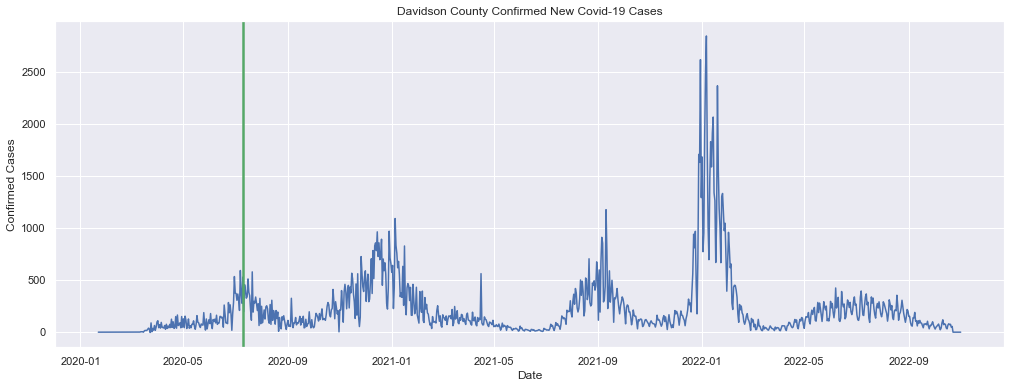

In [12]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'new_cases')
ax.set(title = 'Davidson County Confirmed New Covid-19 Cases', xlabel='Date', ylabel='Confirmed Cases')
plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2.5)
plt.show()

Additionally, as per US News, Tennessee Gov. Bill Lee signed an executive order in April 2021 that removed local authority on mask mandates.

Source: https://www.usnews.com/news/best-states/articles/these-are-the-states-with-mask-mandates#tenn

### Coincidently we observe a short rise in confirmed cases in April 2021 itself

## Marking April 2021 for when masking mandate was officially lifted -

# Derivative function:

Using pct_change to find rate of change of the new cases over time and analysing differences in rates.

This percentage change is calculated between 2 consecutive time periods (Eg. [Week 2 - Week 1]/ Week 1). This shows us the rate of change of infection spread.

In [35]:
davidson_df2 = davidson_df.copy()

davidson_df2['rate_of_change'] = davidson_df2.new_cases.pct_change()

#replacing np.inf and initial day's rate of change to focus of the remainder of days
davidson_df2.loc[davidson_df2['rate_of_change']==np.inf, 'rate_of_change'] = np.nan
#davidson_df2.loc[davidson_df2['rate_of_change']>10, 'rate_of_change'] = np.nan #ignore
#davidson_df2.loc[davidson_df2['rate_of_change']<-10, 'rate_of_change'] = np.nan #ignore

davidson_df2['rate_of_change2'] = davidson_df2['rate_of_change'].copy()

## Analysing rate of change of infection for the 2 aforementioned timelines
Between July 2020 - Sept 2020 and the month of April in 2021.

# Derivative function applied on daily confirmed cases data - 
Using pct_change to find rate of change of the new cases over time and analysing differences in rates.

This percentage change is calculated between 2 consecutive time periods (Eg. [Week 2 - Week 1]/ Week 1). This shows us the rate of change of infection spread.

In [36]:
davidson_df.head(2)

,date,cases,new_cases
0,2020-01-22,0,0.0
1,2020-01-23,0,0.0


In [37]:
davidson_df3 = davidson_df2[(davidson_df2['date']>=pd.to_datetime("2020-03-06")) & (davidson_df2['date']<=pd.to_datetime("2021-11-06"))].reset_index(drop=True)
davidson_df3.head()

,date,cases,new_cases,rate_of_change,rate_of_change2
0,2020-03-06,0,0.0,NaN,NaN
1,2020-03-07,0,0.0,NaN,NaN
2,2020-03-08,1,1.0,NaN,NaN
3,2020-03-09,1,0.0,-1.0,-1.0
4,2020-03-10,1,0.0,NaN,NaN


# VISUALIZATION FOR INITIAL ANALYSIS:

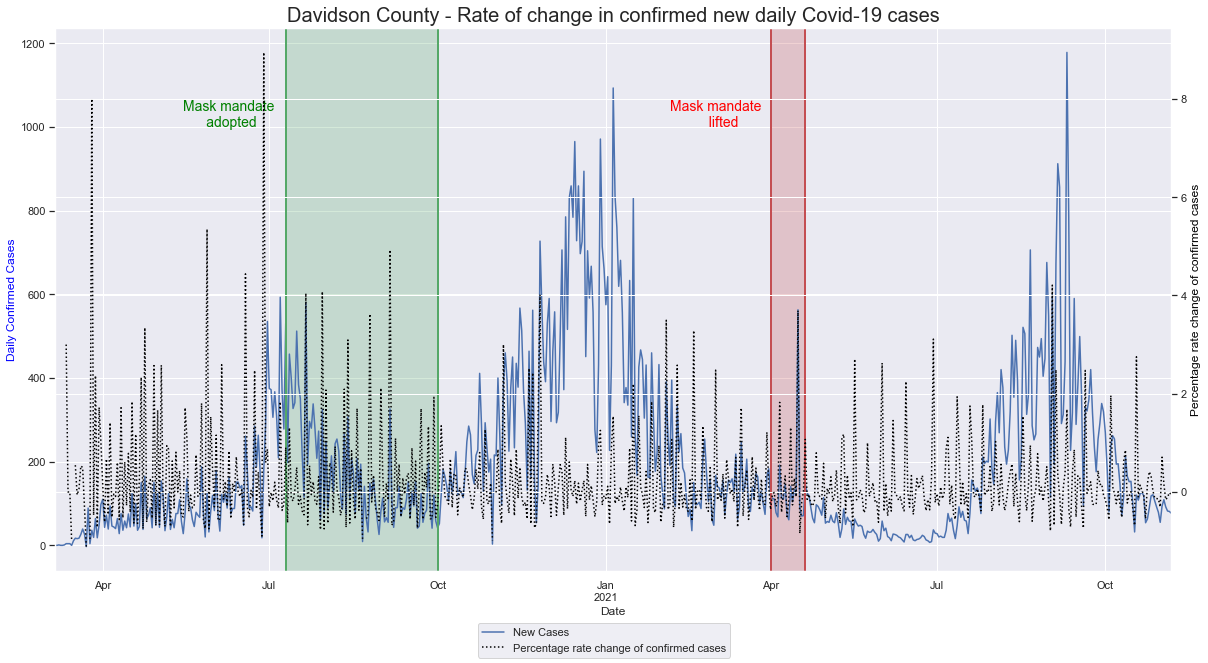

In [40]:
davidson_df3.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(20,10)})
ax = davidson_df3.plot(x="date", y="New Cases", legend=False)
ax.set(xlabel='Date', ylabel='Daily Confirmed Cases')
ax.yaxis.label.set_color('blue')
plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-10-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-20"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-10-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-20"), color='r', alpha=0.25)

plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')


ax2 = ax.twinx()
davidson_df3.plot(x="date", y="Percentage rate change of confirmed cases", ax=ax2, legend=False, color="black", linestyle='dotted')
ax2.set(ylabel='Percentage rate change of confirmed cases')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
plt.show()

### Summary

The rate of change in confirmed daily cases is the black dotted line.

Since this is daily data, we observe a lot of variability throughout. However, if you observe the green phase where mask mandate was adopted, you will notice that the rate of change of cases is lower than prior rates until there is a sharp increase of about 14% in new cases. This could perhaps be because of the complacency of people wearing masks while observing the rate of Covid-19 cases going down (established earlier) and then choosing to remove masks owing to the decreased rate of change.

When the Governor officially lifted the Mask mandate in 2021 (Red phase), we again observe a sudden sharp increase in new cases. We can associate this steep rise due to relatively less or no usage of masks.

As mentioned above, we do observe peaks and troughs in both blue and black lines despite having no direct relation with the available mask mandate data. Therefore, we conclude that the masking policies may not always have a direct impact on the progression of Covid-19 new cases. It is also very important to consider that people did not show symptoms right away after infection. It may have taken a few days for the testing results to become available especially during the early period of the pandemic in 2020.

--------------------------------------------------------

# Part 2 - EXTENSION ANALYSIS

## Loading & Cleaning Vaccination data

In [41]:
vaccination_data = pd.read_csv(r"data/COVID-19_Vaccinations_in_the_United_States_DavidsonCounty.csv")
vaccination_data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_5Plus,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5to17Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_5to17Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Booster_Doses_Vax_Pct_SVI,Booster_Doses_12PlusVax_Pct_SVI,Booster_Doses_18PlusVax_Pct_SVI,Booster_Doses_65PlusVax_Pct_SVI,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,11/30/2022,47037,48,Davidson County,TN,97.8,"534,140",76.9,"528,666",81.6,"508,025",85.6,"477,755",86.7,"85,796",95.0,"470,074",67.7,"467,493",72.1,"43,773",45.1,"449,964",75.8,"423,720",76.9,"79,918",91.8,"238,123",50.7,"237,975",50.9,"234,002",52.0,"225,712",53.3,"119,521",68.2,"62,098",77.7,62282.0,52.1,38265.0,61.6,C,11.0,11.0,11.0,11.0,11.0,12.0,Metro,3.0,3.0,3.0,3.0,3.0,4.0,12.0,12.0,12.0,11.0,4.0,4.0,4.0,3.0,"694,144","648,128","97,057","593,793","551,071","87,023"
1,11/23/2022,47037,47,Davidson County,TN,97.8,"533,807",76.9,"528,405",81.5,"507,786",85.5,"477,528",86.7,"85,776",95.0,"469,787",67.7,"467,270",72.1,"43,720",45.0,"449,777",75.7,"423,550",76.9,"79,897",91.8,"237,713",50.6,"237,568",50.8,"233,688",52.0,"225,453",53.2,"119,392",68.1,"62,032",77.6,61728.0,51.7,38011.0,61.3,C,11.0,11.0,11.0,11.0,11.0,12.0,Metro,3.0,3.0,3.0,3.0,3.0,4.0,12.0,12.0,12.0,11.0,4.0,4.0,4.0,3.0,"694,144","648,128","97,057","593,793","551,071","87,023"
2,11/16/2022,47037,46,Davidson County,TN,97.8,"533,295",76.8,"527,994",81.5,"507,421",85.5,"477,193",86.6,"85,720",95.0,"469,400",67.6,"466,956",72.0,"43,661",45.0,"449,502",75.7,"423,295",76.8,"79,848",91.8,"237,002",50.5,"236,859",50.7,"233,111",51.9,"224,939",53.1,"119,144",68.0,"61,925",77.6,60622.0,50.9,37436.0,60.5,C,11.0,11.0,11.0,11.0,11.0,12.0,Metro,3.0,3.0,3.0,3.0,3.0,4.0,12.0,12.0,12.0,11.0,4.0,4.0,4.0,3.0,"694,144","648,128","97,057","593,793","551,071","87,023"
3,11/09/2022,47037,45,Davidson County,TN,97.7,"532,531",76.7,"527,437",81.4,"506,953",85.4,"476,757",86.5,"85,661",95.0,"468,788",67.5,"466,511",72.0,"43,548",44.9,"449,136",75.6,"422,963",76.8,"79,787",91.7,"236,024",50.3,"235,883",50.6,"232,364",51.7,"224,333",53.0,"118,862",67.9,"61,786",77.4,59197.0,49.8,36704.0,59.4,C,11.0,11.0,11.0,11.0,11.0,12.0,Metro,3.0,3.0,3.0,3.0,3.0,4.0,12.0,12.0,12.0,11.0,4.0,4.0,4.0,3.0,"694,144","648,128","97,057","593,793","551,071","87,023"
4,11/02/2022,47037,44,Davidson County,TN,97.7,"531,718",76.6,"526,776",81.3,"506,381",85.3,"476,219",86.4,"85,586",95.0,"468,147",67.4,"465,992",71.9,"43,430",44.

In [42]:
vaccination_data['Date'] = pd.to_datetime(vaccination_data['Date'])
vaccination_data = vaccination_data.sort_values(by = ['Date']).reset_index(drop=True)
vaccination_data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_5Plus,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5to17Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_5to17Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Booster_Doses_Vax_Pct_SVI,Booster_Doses_12PlusVax_Pct_SVI,Booster_Doses_18PlusVax_Pct_SVI,Booster_Doses_65PlusVax_Pct_SVI,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,2020-12-13,47037,51,Davidson County,TN,0.0,0,0.0,NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"694,144",NaN,NaN,"593,793","551,071",NaN
1,2020-12-14,47037,51,Davidson County,TN,0.0,0,0.0,NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"694,144",NaN,NaN,"593,793","551,071",NaN
2,2020-12-15,47037,51,Davidson County,TN,0.0,0,0.0,NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"694,144",NaN,NaN,"593,793","551,071",NaN
3,2020-12-16,47037,51,Davidson County,TN,0.0,0,0.0,NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"694,144",NaN,NaN,"593,793","551,071",NaN
4,2020-12-17,47037,51,Davidson County,TN,0.0,0,0.0,NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"694,144",NaN,NaN,"593,793","551,071",NaN


In [44]:
#cleaning vaccination data and converting to float type -
vaccination_data['Administered_Dose1_Recip_18Plus'] = vaccination_data['Administered_Dose1_Recip_18Plus'].str.replace(',','').astype(float)


<AxesSubplot:xlabel='Date', ylabel='Administered_Dose1_Recip_18Plus'>

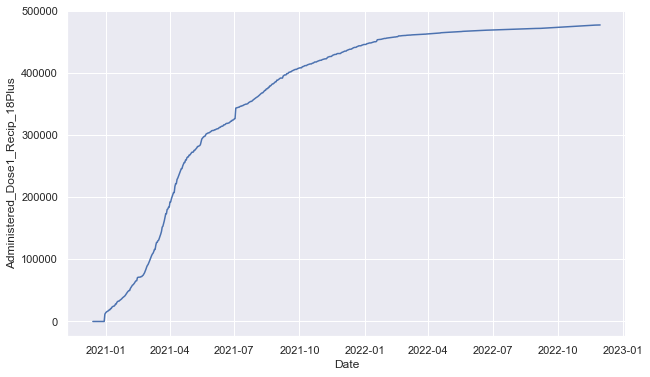

In [45]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = vaccination_data, x = 'Date', y = 'Administered_Dose1_Recip_18Plus')

In [46]:
# finding daily new vaccination dose data
vaccination_data['New_vaccination_dose1'] = vaccination_data['Administered_Dose1_Recip_18Plus'] - vaccination_data.shift(periods=1)['Administered_Dose1_Recip_18Plus']
vaccination_data = vaccination_data.fillna(0)
vaccination_data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_5Plus,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5to17Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_5to17Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Booster_Doses_Vax_Pct_SVI,Booster_Doses_12PlusVax_Pct_SVI,Booster_Doses_18PlusVax_Pct_SVI,Booster_Doses_65PlusVax_Pct_SVI,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,New_vaccination_dose1
0,2020-12-13,47037,51,Davidson County,TN,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,C,0.0,0.0,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"694,144",0,0,"593,793","551,071",0,0.0
1,2020-12-14,47037,51,Davidson County,TN,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,C,0.0,0.0,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"694,144",0,0,"593,793","551,071",0,0.0
2,2020-12-15,47037,51,Davidson County,TN,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,C,0.0,0.0,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"694,144",0,0,"593,793","551,071",0,0.0
3,2020-12-16,47037,51,Davidson County,TN,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,C,0.0,0.0,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"694,144",0,0,"593,793","551,071",0,0.0
4,2020-12-17,47037,51,Davidson County,TN,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,C,0.0,0.0,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"694,144",0,0,"593,793","551,071",0,0.0


<AxesSubplot:xlabel='Date', ylabel='New_vaccination_dose1'>

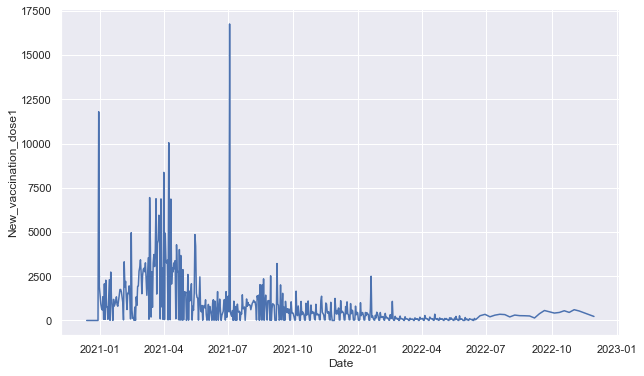

In [47]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = vaccination_data, x = 'Date', y = 'New_vaccination_dose1')

In [48]:
vaccination_data['vaccination_rate_of_change'] = vaccination_data.New_vaccination_dose1.pct_change()

#replacing np.inf and initial day's rate of change to focus of the remainder of days
vaccination_data.loc[vaccination_data['vaccination_rate_of_change']==np.inf, 'vaccination_rate_of_change'] = np.nan
# davidson_df_weekly.loc[davidson_df_weekly['rate_of_change']>10, 'rate_of_change'] = np.nan

<AxesSubplot:xlabel='Date', ylabel='vaccination_rate_of_change'>

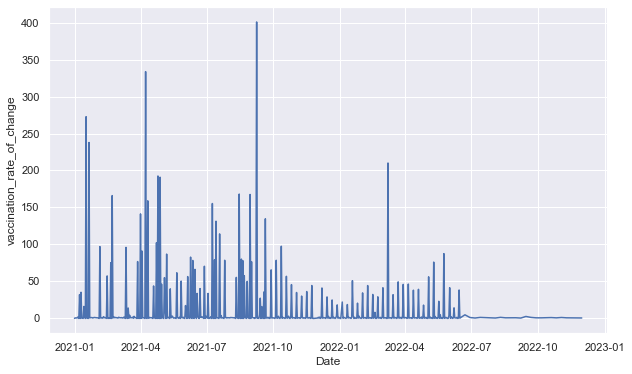

In [49]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = vaccination_data, x = 'Date', y = 'vaccination_rate_of_change')

In [50]:
## aggregating vaccination data to monthly level
vaccination_monthly_data = vaccination_data[['Date','Administered_Dose1_Recip_18Plus']].set_index('Date').resample('MS').sum()
vaccination_monthly_data

,Administered_Dose1_Recip_18Plus
Date,
2020-12-01,25505.0
2021-01-01,930063.0
2021-02-01,1896700.0
2021-03-01,4223549.0
2021-04-01,7107230.0
2021-05-01,9010095.0
2021-06-01,9478266.0
2021-07-01,10820966.0
2021-08-01,11617832.0


## Loading and cleaning CCI data

In [51]:
cci_data = pd.read_csv(r"data/consumer_confidence_index_USA.csv")
cci_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,CCI,AMPLITUD,LTRENDIDX,M,2019-08,100.8929,NaN
1,USA,CCI,AMPLITUD,LTRENDIDX,M,2019-09,100.8929,NaN
2,USA,CCI,AMPLITUD,LTRENDIDX,M,2019-10,101.0988,NaN
3,USA,CCI,AMPLITUD,LTRENDIDX,M,2019-11,101.3715,NaN
4,USA,CCI,AMPLITUD,LTRENDIDX,M,2019-12,101.6026,NaN


<AxesSubplot:xlabel='TIME', ylabel='Value'>

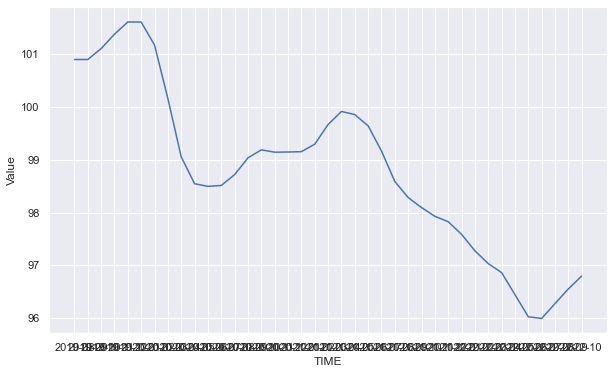

In [52]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = cci_data, x = 'TIME', y = 'Value')

In [53]:
cci_data['date'] = pd.to_datetime(dict(year=cci_data['TIME'].str[:4].astype(int),
                    month=cci_data['TIME'].str[-2:].astype(int),
                    day = 1))

## Aggregating davidson daily cases data to monthly level

In [54]:
davidson_df.set_index('date', inplace=True)

In [55]:
davidson_monthly_df = davidson_df.resample('MS').sum().reset_index().drop(columns = ['cases'])
davidson_monthly_df

,date,new_cases
0,2020-01-01,0.0
1,2020-02-01,0.0
2,2020-03-01,541.0
3,2020-04-01,2082.0
4,2020-05-01,2550.0
5,2020-06-01,4488.0
6,2020-07-01,9927.0
7,2020-08-01,4447.0
8,2020-09-01,2969.0
9,2020-10-01,5459.0


## Loading and Cleaning Employment data

In [56]:
employment_by_industry_df = pd.read_csv(r"data/Employment by Industry Sector.csv")
employment_by_industry_df

,Month of Year ID,Month of Year,Supersector ID,Supersector,NSA Employees,Date,NSA Employees Growth
0,2018-01,"January, 2018",15,"Mining, Logging, and Construction",7432200,2018-01-01,4.594903
1,2018-01,"January, 2018",30,Manufacturing,12535600,2018-01-01,1.310877
2,2018-01,"January, 2018",40,"Trade, Transportation, and Utilities",27568500,2018-01-01,0.830609
3,2018-01,"January, 2018",50,Information,2825000,2018-01-01,0.365936
4,2018-01,"January, 2018",55,Financial Activities,8425200,2018-01-01,1.466869
5,2018-01,"January, 2018",60,Professional and Business Services,20421300,2018-01-01,1.972915
6,2018-01,"January, 2018",65,Education and Health Services,23400600,2018-01-01,2.088841
7,2018-01,"January, 2018",70,Leisure and Hospitality,15470800,2018-01-01,1.968073
8,2018-01,"January, 2018",80,Other Services,5659200,2018-01-01,0.839258
9,2018-01,"January, 2018",90,Government,22824000,2018-01-01,0.166769


In [57]:
employment_by_industry_df['Date'] = pd.to_datetime(employment_by_industry_df.Date)

# MAIN ANALYSIS with Visualizations -

In [59]:
#merging covid cases data with CCI data
p2_df = pd.merge(davidson_monthly_df, cci_data[['date','Value']], on = 'date').rename(columns = {'Value':'CCI'})
p2_df.head()

,date,new_cases,CCI
0,2020-01-01,0.0,101.60100
1,2020-02-01,0.0,101.16660
2,2020-03-01,541.0,100.15390
3,2020-04-01,2082.0,99.05240
4,2020-05-01,2550.0,98.54501


In [60]:
p2_df.corr()

,new_cases,CCI
new_cases,1.000000,-0.193559
CCI,-0.193559,1.000000


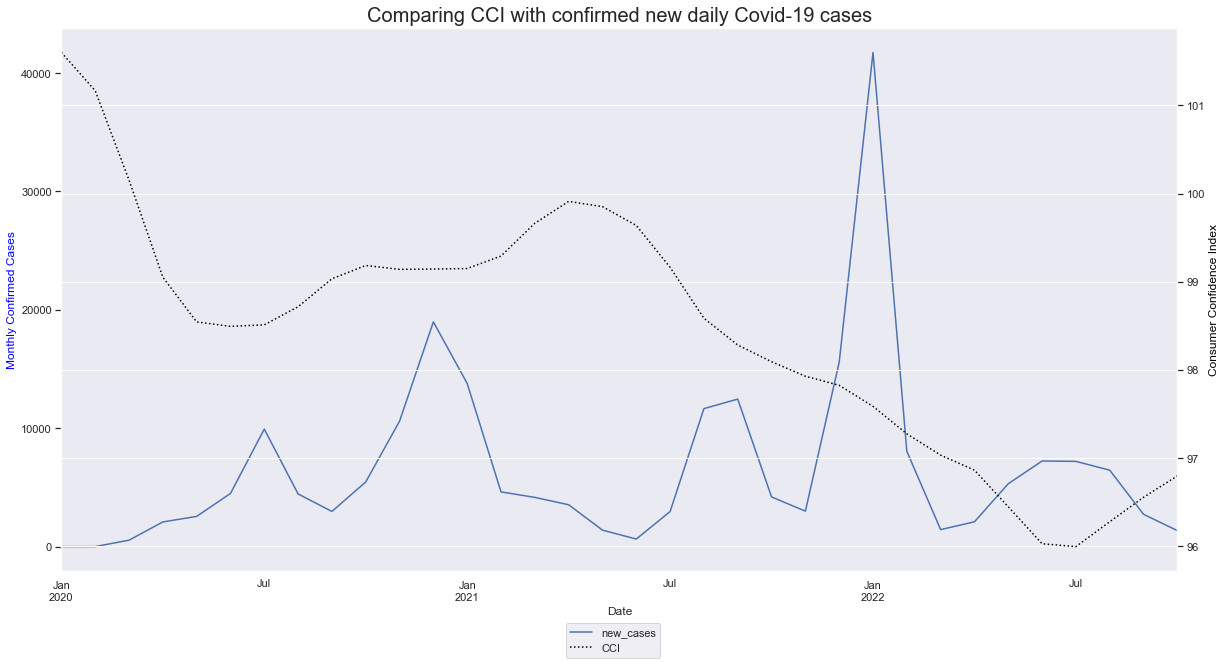

In [67]:
sns.set(rc={'figure.figsize':(20,10)})
ax = p2_df.plot(x="date", y="new_cases", legend=False)
ax.set(xlabel='Date', ylabel='Monthly Confirmed Cases')
ax.yaxis.label.set_color('blue')
plt.title('Comparing CCI with confirmed new daily Covid-19 cases', fontsize = 20)

ax2 = ax.twinx()
p2_df.plot(x="date", y="CCI", ax=ax2, legend=False, color="black", linestyle='dotted')
ax2.set(ylabel='Consumer Confidence Index')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

### Clear Negative correlation observed between CCI and new cases. As cases trend goes up, the CCI trend goes down.

In [63]:
p2_df_v2 = p2_df.copy()

In [64]:
## merging dataframe with employment_by_industry_df.

p2_df_v2 = pd.merge(p2_df_v2, employment_by_industry_df[['Date','Supersector','NSA Employees Growth']],
                 left_on = 'date', right_on = 'Date')
p2_df_v2.head()

,date,new_cases,CCI,Date,Supersector,NSA Employees Growth
0,2020-01-01,0.0,101.601,2020-01-01,"Mining, Logging, and Construction",1.593830
1,2020-01-01,0.0,101.601,2020-01-01,Manufacturing,-0.281331
2,2020-01-01,0.0,101.601,2020-01-01,"Trade, Transportation, and Utilities",0.479676
3,2020-01-01,0.0,101.601,2020-01-01,Information,2.325500
4,2020-01-01,0.0,101.601,2020-01-01,Financial Activities,1.834239


## Observing how different industry sectors performed. Employment growth for all sectors follow a similar direction. However, the Leisure and Hospitality sector took the biggest hit. So we will continue our analysis for the said sector for plausible results

<AxesSubplot:xlabel='date', ylabel='NSA Employees Growth'>

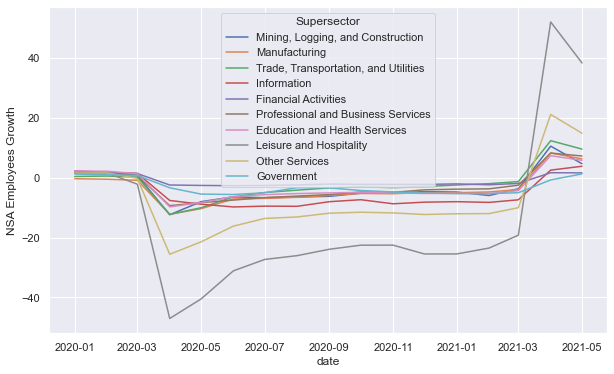

In [65]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = p2_df_v2, x = 'date', y = 'NSA Employees Growth', hue = 'Supersector')
#monthly growth, year-over-year

In [66]:
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality']

,date,new_cases,CCI,Date,Supersector,NSA Employees Growth
7,2020-01-01,0.0,101.60100,2020-01-01,Leisure and Hospitality,1.609171
17,2020-02-01,0.0,101.16660,2020-02-01,Leisure and Hospitality,1.609813
27,2020-03-01,541.0,100.15390,2020-03-01,Leisure and Hospitality,-2.109376
37,2020-04-01,2082.0,99.05240,2020-04-01,Leisure and Hospitality,-47.024138
47,2020-05-01,2550.0,98.54501,2020-05-01,Leisure and Hospitality,-40.510336
57,2020-06-01,4488.0,98.49448,2020-06-01,Leisure and Hospitality,-31.093034
67,2020-07-01,9927.0,98.51203,2020-07-01,Leisure and Hospitality,-27.284602
77,2020-08-01,4447.0,98.71681,2020-08-01,Leisure and Hospitality,-26.015518
87,2020-09-01,2969.0,99.03383,2020-09-01,Leisure and Hospitality,-23.872075
97,2020-10-01,5459.0,99.18475,2020-10-01,Leisure and Hospitality,-22.515734


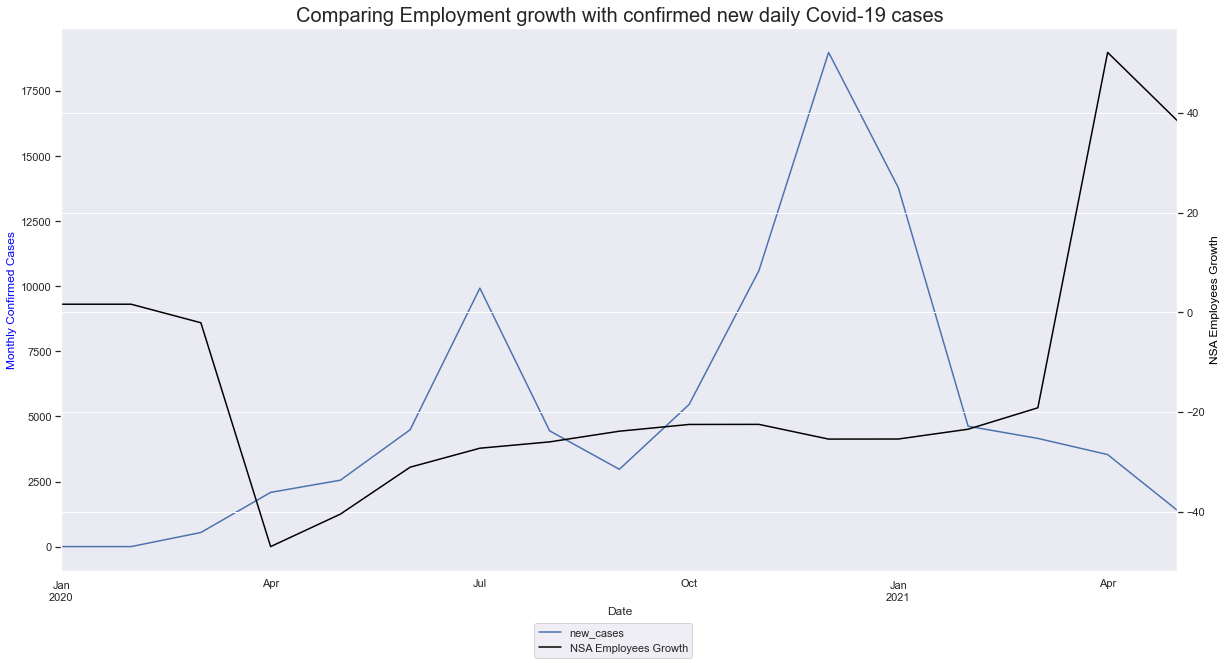

In [68]:
sns.set(rc={'figure.figsize':(20,10)})
ax = p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="new_cases", legend=False)
ax.set(xlabel='Date', ylabel='Monthly Confirmed Cases')
ax.yaxis.label.set_color('blue')
plt.title('Comparing Employment growth with confirmed new daily Covid-19 cases', fontsize = 20)

ax2 = ax.twinx()
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="NSA Employees Growth", ax=ax2, legend=False, color="black")
ax2.set(ylabel='NSA Employees Growth')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

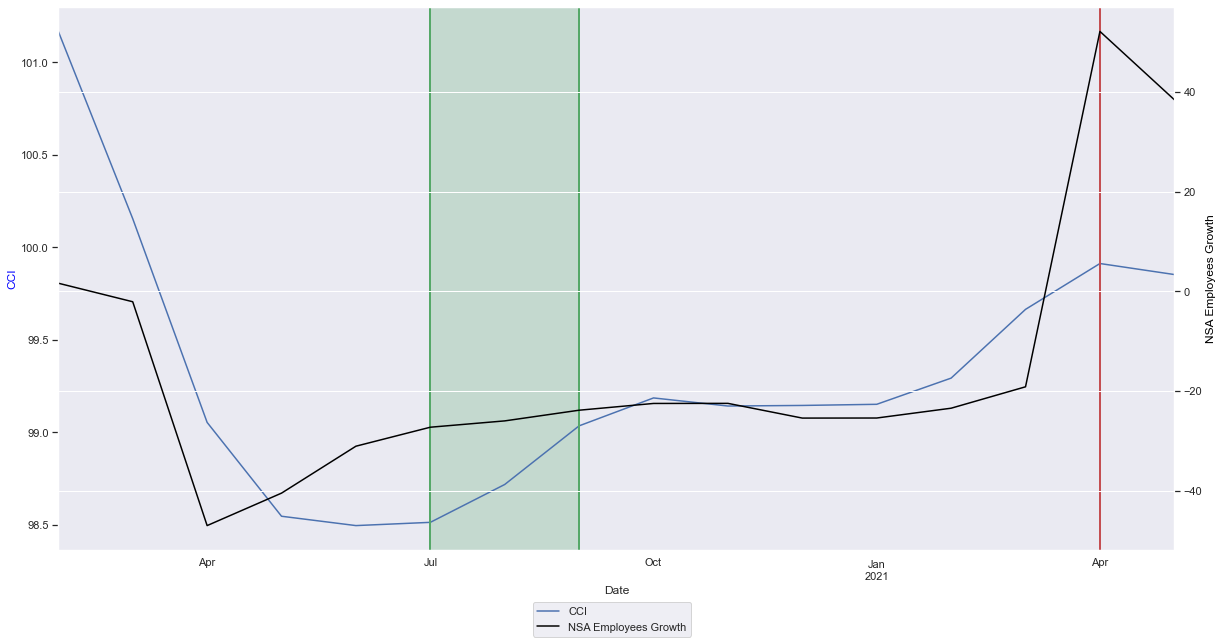

In [123]:
sns.set(rc={'figure.figsize':(20,10)})
ax = p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="CCI", legend=False)
ax.set(xlabel='Date', ylabel='CCI')
ax.yaxis.label.set_color('blue')
plt.title('Comparing CCI with Employment growth', fontsize = 20)

ax2 = ax.twinx()
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="NSA Employees Growth", ax=ax2, legend=False, color="black")
ax2.set(ylabel='NSA Employees Growth')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

## Correlation Analysis

In [124]:
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].corr()
# please ignore unemployment rate which was unused due to improper data availability

,new_cases,unemployment_rate,CCI,NSA Employees Growth
new_cases,1.000000,-0.052054,-0.382898,-0.280898
unemployment_rate,-0.052054,1.000000,-0.741846,-0.617711
CCI,-0.382898,-0.741846,1.000000,0.626868
NSA Employees Growth,-0.280898,-0.617711,0.626868,1.000000


You can see how the confirmed cases are negatively correlated with employment growth (-0.28). There is also a more significant negative correlation between confirmed cases and CCI (-0.38).

<AxesSubplot:>

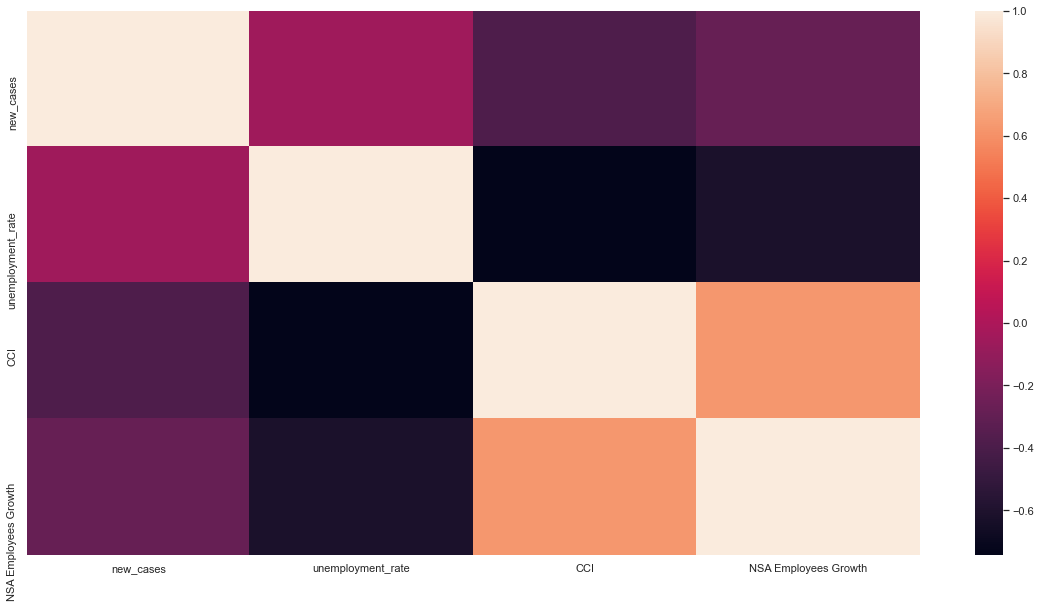

In [125]:
sns.heatmap(p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].corr())

In [73]:
p2_df_v3 = p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].reset_index(drop=True)
p2_df_v3.head()

,date,new_cases,CCI,Date,Supersector,NSA Employees Growth
0,2020-01-01,0.0,101.60100,2020-01-01,Leisure and Hospitality,1.609171
1,2020-02-01,0.0,101.16660,2020-02-01,Leisure and Hospitality,1.609813
2,2020-03-01,541.0,100.15390,2020-03-01,Leisure and Hospitality,-2.109376
3,2020-04-01,2082.0,99.05240,2020-04-01,Leisure and Hospitality,-47.024138
4,2020-05-01,2550.0,98.54501,2020-05-01,Leisure and Hospitality,-40.510336


## Merging Covid cases, CCI and employment data with vaccination data

In [74]:
p2_df_v4 = pd.merge(p2_df_v3,vaccination_monthly_data, left_on = 'date',
                                  right_on = 'Date', how = 'left')
p2_df_v4.head()

,date,new_cases,CCI,Date,Supersector,NSA Employees Growth,Administered_Dose1_Recip_18Plus
0,2020-01-01,0.0,101.60100,2020-01-01,Leisure and Hospitality,1.609171,NaN
1,2020-02-01,0.0,101.16660,2020-02-01,Leisure and Hospitality,1.609813,NaN
2,2020-03-01,541.0,100.15390,2020-03-01,Leisure and Hospitality,-2.109376,NaN
3,2020-04-01,2082.0,99.05240,2020-04-01,Leisure and Hospitality,-47.024138,NaN
4,2020-05-01,2550.0,98.54501,2020-05-01,Leisure and Hospitality,-40.510336,NaN


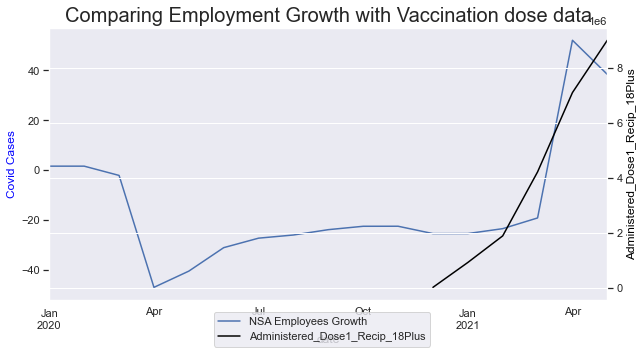

In [75]:
sns.set(rc={'figure.figsize':(10,5)})
ax = p2_df_v4.plot(x="date", y="NSA Employees Growth", legend=False)
ax.set(xlabel='date', ylabel='Covid Cases')
ax.yaxis.label.set_color('blue')
plt.title('Comparing Employment Growth with Vaccination dose data', fontsize = 20)

ax2 = ax.twinx()
p2_df_v4.plot(x="date", y="Administered_Dose1_Recip_18Plus", ax=ax2, legend=False, color="black")
ax2.set(ylabel='Administered_Dose1_Recip_18Plus')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

## Correlation Analysis after adding Vaccination data to dataframe

In [212]:
p2_df_v4.corr()
# please ignore unemployment rate which was unused due to improper data availability

,new_cases,unemployment_rate,CCI,NSA Employees Growth,Administered_Dose1_Recip_18Plus
new_cases,1.000000,-0.052054,-0.382898,-0.280898,-0.817741
unemployment_rate,-0.052054,1.000000,-0.741846,-0.617711,-0.951126
CCI,-0.382898,-0.741846,1.000000,0.626868,0.956956
NSA Employees Growth,-0.280898,-0.617711,0.626868,1.000000,0.900964
Administered_Dose1_Recip_18Plus,-0.817741,-0.951126,0.956956,0.900964,1.000000


## CONCLUSION -

### When the first vaccine doses were administered there was an extremely significant positive correlation between vaccination doses and employment growth (0.9) as well as a positive correlation between vaccination doses and CCI (0.96). This shows a positive association between vaccination and monetary measures like employment growth and consumer confidence index.

### I observed a positive correlation between vaccination and monetary measures like employment growth and consumer confidence index. However, it is important to keep in mind that correlation does not necessarily imply causation. Although, this trend along with the correlation numbers does paint a bright picture and confirms CBC News’ understanding that mass vaccinations have been held up as the one and only way to get consumers to bring back the consumer economy.

---------------------------------

### Additional Analysis -
I tried standardizing the data to plot & view them together. The scales & range of all data columns was vastly different. Standardizing it by using MinMaxScaler helps analyse all columns together

In [76]:
from sklearn import preprocessing
# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

In [77]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(p2_df_v4[['new_cases', 'CCI', 'NSA Employees Growth',
       'Administered_Dose1_Recip_18Plus']].values)
p2_df_v5 = pd.DataFrame(x_scaled)
p2_df_v5['date'] = p2_df_v4['date']
p2_df_v5.columns = ['new_cases', 'CCI', 'NSA Employees Growth',
       'Administered_Dose1_Recip_18Plus','date']

In [210]:
#p2_df_v5.to_excel(r"result_standardized.xlsx",index=False)

In [78]:
dfm = p2_df_v5.melt('date', var_name='cols', value_name='values')

<AxesSubplot:xlabel='date', ylabel='values'>

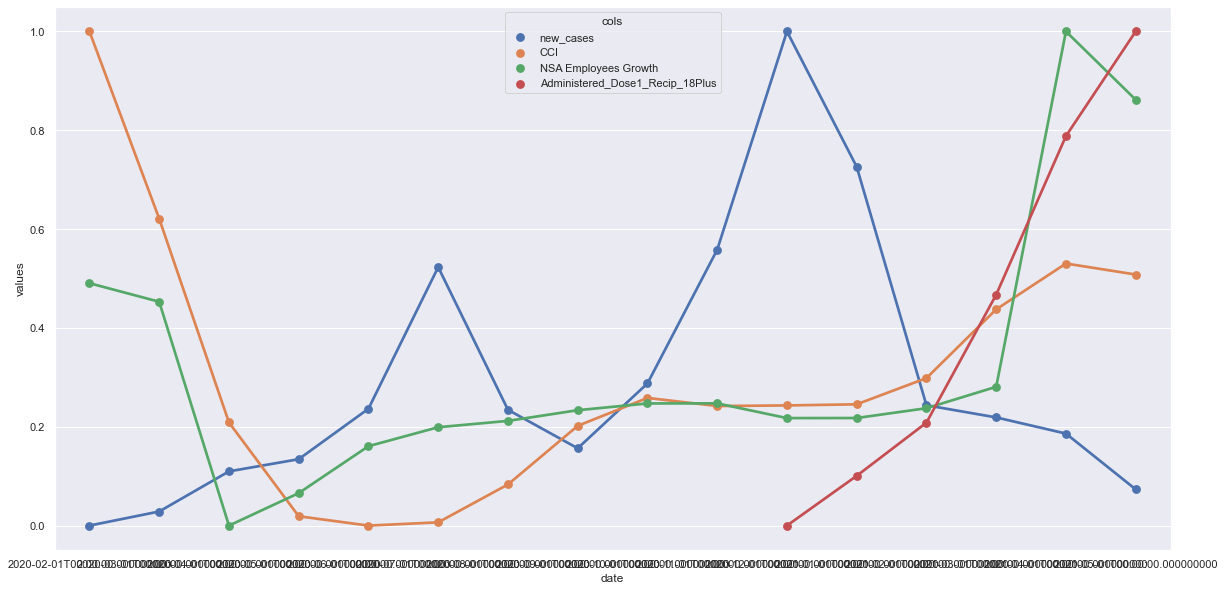

In [207]:
sns.set(rc={'figure.figsize':(20,10)})
sns.pointplot(x="date", y="values", hue='cols', data=dfm)